# Introduction to Pandas

This tutorial is partially based on the ["Solving real world data science tasks with Python Pandas!"](https://github.com/KeithGalli/Pandas-Data-Science-Tasks) tutorial, by Keith Galli.

The [Sales dataset](https://github.com/KeithGalli/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Sales_Data) used in this tutorial comes from the aforementioned Keith's tutorial.

## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

## Load and explore sales data for one month 

### Load sales data from a csv file

The data is stored in the 'sales_data' directory, within the 'data' directory. We'll start by creating a function for accessing the sales data directory.

In [2]:
def get_data_dir():
    data_dir = Path.cwd() / "data" / "sales_data"
    if not data_dir.exists(): data_dir.mkdir()
    return data_dir

In [3]:
print(get_data_dir())

/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data


In [4]:
jan_sales = pd.read_csv(get_data_dir() / 'Sales_January_2019.csv')
jan_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### Explore the loaded data

First, get the size of the dataframe (df), that is, the number of rows and columns

In [5]:
jan_sales.shape

(9723, 6)

Access columns' names

In [6]:
jan_sales.columns.values

array(['Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address'], dtype=object)

Examine the columns' data types

In [7]:
jan_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Get a complete set of information about the df

In [8]:
jan_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


### Examine the missing values

Note the use of the `isna()` method

In [9]:
jan_sales.isna().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

#### Remove rows with all missing values

Note the use of the `dropna()` method

In [10]:
jan_sales.dropna(how='all', inplace=True)

In [11]:
jan_sales.isna().sum().sum()

0

### Subset the data frame or select particular rows / columns

This can be done in different ways; the recommended practice is to use Dataframe methods `loc` or `iloc`.

When doing the selection based on the ordinal number of rows and columns, `iloc` should be used.

When the selection is to be based on a condition to be evaluated against rows and / or columns are to be selected based on their names, `loc` should be used. 

**Example 1**: select first 3 columns and first 6 rows

In [12]:
jan_sales.iloc[:6, :3]

,Order ID,Product,Quantity Ordered
0,141234,iPhone,1
1,141235,Lightning Charging Cable,1
2,141236,Wired Headphones,2
3,141237,27in FHD Monitor,1
4,141238,Wired Headphones,1
5,141239,AAA Batteries (4-pack),1


**Example 2**: select the last 5 rows and 1st, 2nd and 5th column

In [13]:
jan_sales.iloc[-5:, [0,1,4]]

,Order ID,Product,Order Date
9718,150497,20in Monitor,01/26/19 19:09
9719,150498,27in FHD Monitor,01/10/19 22:58
9720,150499,ThinkPad Laptop,01/21/19 14:31
9721,150500,AAA Batteries (4-pack),01/15/19 14:21
9722,150501,Google Phone,01/13/19 16:43


**Example 3**: Select Order ID, Order Date, and Purchase Address for orders coming from Boston

Note the use of `str` to get the string value out of a pandas Series (the Purchase Address column), so that we can call any string method on it

In [14]:
jan_sales.loc[jan_sales['Purchase Address'].str.contains('Boston'), ['Order ID', 'Order Date', 'Purchase Address']]

,Order ID,Order Date,Purchase Address
0,141234,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
17,141251,01/24/19 08:13,"414 Walnut St, Boston, MA 02215"
29,141263,01/11/19 23:33,"640 Spruce St, Boston, MA 02215"
31,141265,01/01/19 16:52,"853 Ridge St, Boston, MA 02215"
37,141271,01/30/19 10:51,"90 13th St, Boston, MA 02215"
...,...,...,...
9627,150409,01/10/19 02:38,"410 Forest St, Boston, MA 02215"
9660,150440,01/10/19 19:19,"82 Johnson St, Boston, MA 02215"
9666,150445,01/11/19 13:56,"147 Lincoln St, Boston, MA 02215"
9694,150473,01/10/19 09:09,"148 Hickory St, Boston, MA 02215"


**Example 4**: Select Order ID, Product and Price Each for orders where the ordered quantity is at least 3

Note that even though the Quantity Ordered column stores numeric information, its values are encoded as strings: 

In [15]:
type(jan_sales['Quantity Ordered'][0])

str

So, we first need to transform the Quantity Ordered column to numeric type. <br>To that end, we use `pd.to_numeric()` function:

In [16]:
jan_sales['Quantity Ordered'] = pd.to_numeric(jan_sales['Quantity Ordered'], errors='coerce')

Now, we can do the intended selection:

In [17]:
jan_sales.loc[jan_sales['Quantity Ordered'] >= 3, ['Order ID', 'Price Each', 'Product']]

,Order ID,Price Each,Product
12,141246,2.99,AAA Batteries (4-pack)
52,141285,2.99,AAA Batteries (4-pack)
58,141290,3.84,AA Batteries (4-pack)
73,141305,2.99,AAA Batteries (4-pack)
84,141316,2.99,AAA Batteries (4-pack)
...,...,...,...
9513,150299,3.84,AA Batteries (4-pack)
9590,150372,2.99,AAA Batteries (4-pack)
9636,150417,11.99,Wired Headphones
9659,150439,11.99,Wired Headphones


## Load sales data for all months in 2019 and merge them into one data set

We need to load the sales data from all csv files (one for each month) available in the sales data directory. 

Let's first see how to take only .csv files from a given directory:

In [25]:
# the glob() f. finds all the pathnames matching a specified pattern
for f in get_data_dir().glob('*.csv'):
    print(f)

/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_December_2019.csv
/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_April_2019.csv
/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_February_2019.csv
/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_March_2019.csv
/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_August_2019.csv
/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_May_2019.csv
/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_November_2019.csv
/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_October_2019.csv
/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_January_2019.csv
/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_September_2019.csv
/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_July_2019.csv
/Users/Jelena/Learning/Pandas/P3 tutorial/data/sales_data/Sales_June_2019.csv


We'll now take each csv file in turn, load the data from it and add the loaded data into a common DataFrame that stores sales data for the whole year.

To merge two DataFrames, we'll use `pd.concat` function

In [26]:
all_sales = pd.DataFrame()

for sales_file in get_data_dir().glob('*.csv'):
    sales_data = pd.read_csv(sales_file)
    all_sales = pd.concat([all_sales, sales_data])

all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [27]:
all_sales.shape

(186850, 6)

In [28]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


Note the difference between the number of entries and the index values. It seems that some files have overlaping indexes. To fix this, we need to reset the index of the merged data frame.

In [29]:
all_sales.reset_index(drop=True, inplace=True)

In [30]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Write the merged data to a file, in case we need to get back to it

In [32]:
all_sales.to_csv(Path.cwd() / 'data' / 'all_sales_data.csv', index=False)

## Explore the merged sales data 

Rename the DataFrame, to reduce the typing: 

In [34]:
sales = all_sales

Note that we are just giving a new name to the same object, that is, we are not creating a new DataFrame object with this statement. 

In [35]:
sales is all_sales 

True

To create a new DataFrame object, we would need to do, for example, the following:

In [36]:
tmp = all_sales.copy()
tmp is all_sales

False

In [37]:
del tmp

Let's take a look at the data...

In [38]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [39]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Note that all the data are stored as object (string) values. We will need to change that for the Quantity Ordered, Price Each and Order Date columns. But before that, we will handle missing values.

### Remove observations with all missing values

Let's first check for the presence of missing values across columns

In [40]:
sales.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

It seems that entire rows of data are missing, that is, we have observations with all missing values. <br>Let's check that:

In [45]:
sales.loc[sales.Product.isna()].sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
67099,NaN,NaN,NaN,NaN,NaN,NaN
116171,NaN,NaN,NaN,NaN,NaN,NaN
117351,NaN,NaN,NaN,NaN,NaN,NaN
27109,NaN,NaN,NaN,NaN,NaN,NaN
138112,NaN,NaN,NaN,NaN,NaN,NaN
35369,NaN,NaN,NaN,NaN,NaN,NaN
179446,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
148554,NaN,NaN,NaN,NaN,NaN,NaN
7045,NaN,NaN,NaN,NaN,NaN,NaN


Remove observations with all missing values

In [ ]:
sales.dropna(how='all', inplace=True)

In [ ]:
sales.isna().sum().sum()

### Convert Quantity Ordered and Price Each to numeric values, and Order Date into datetime type

A useful reference for this type of conversion:
https://stackoverflow.com/questions/15891038/change-column-type-in-pandas

In [46]:
sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

To start, let's try to convert Quantity Ordered to a numeric column

In [47]:
try:
    pd.to_numeric(sales['Quantity Ordered']).dtype
except ValueError as err:
    print(err)

Unable to parse string "Quantity Ordered" at position 254


In [48]:
sales.iloc[254, :]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 254, dtype: object

This looks like some erroneous data that we do not need. So, we will do the conversion (to numeric type) and, along the way, replace such erronous data with NaN  

In [49]:
sales['Quantity Ordered'] = pd.to_numeric(sales['Quantity Ordered'], errors='coerce')

In [50]:
sales['Quantity Ordered'].describe()

count    185950.000000
mean          1.124383
std           0.442793
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: Quantity Ordered, dtype: float64

In [52]:
# sales['Quantity Ordered'].isna().sum()
sales['Quantity Ordered'].isna().mean()

0.004816697886004816

Do the same for the Price Each column

In [53]:
try:
    sales['Price Each'] = pd.to_numeric(sales['Price Each'])
except ValueError as err:
    print(err)

Unable to parse string "Price Each" at position 254


In [54]:
sales['Price Each'] = pd.to_numeric(sales['Price Each'], errors='coerce')

In [56]:
sales['Price Each'].describeribe()

count    185950.000000
mean        184.399735
std         332.731330
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        1700.000000
Name: Price Each, dtype: float64

In [55]:
sales['Price Each'].isna().sum()

900

Drop rows where ordered quantity and price are unavailable (NaN)

In [57]:
sales.dropna(how='any', inplace=True)

In [58]:
sales.isna().sum().sum()

0

Check the size of the dataset after the removal of rows with missing values

In [59]:
sales.shape

(185950, 6)

Finally, transform the Order Date to datetime type

In [60]:
try:
    sales['Order Date'] =  pd.to_datetime(sales['Order Date'])
except ValueError as err:
    print(err)

It seems that this transformation went well. <br>
Let's check the data types

In [61]:
sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Add Purchase City column

Let's see how we can create a new column out of an existing one.

Since we may be interested in comparing sales across cities, we will add a column with the name of the city where the order was made. The city name should be followed by the state label, given in brackets (e.g. 'Atlanta (GA)'), to disambigute cities with common names.   

In [62]:
sales['Purchase Address'].head()

0    136 Church St, New York City, NY 10001
1       562 2nd St, New York City, NY 10001
2      277 Main St, New York City, NY 10001
3       410 6th St, San Francisco, CA 94016
4             43 Hill St, Atlanta, GA 30301
Name: Purchase Address, dtype: object

We will start by creating a function that can extract the city (and state label) from the Purchase Address column. 

In [63]:
def get_city(address):
    street, city, state = address.split(',')
    st_label, st_zip = state.lstrip().split()
    return f"{city.lstrip()} ({st_label})"

Next, we will *apply* the `get_city` function to each value of the Purchase Address series.

In [64]:
sales['Purchase Address'].sample(10).apply(get_city)

53648           Atlanta (GA)
101592    San Francisco (CA)
135938         Portland (OR)
146717           Boston (MA)
798         Los Angeles (CA)
93094           Atlanta (GA)
40040            Austin (TX)
36215           Atlanta (GA)
90134            Austin (TX)
46410           Atlanta (GA)
Name: Purchase Address, dtype: object

In [65]:
sales['Purchase City'] = sales['Purchase Address'].apply(get_city)

In [66]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",New York City (NY)
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",New York City (NY)
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",New York City (NY)
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",San Francisco (CA)
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",Atlanta (GA)


## Exploratory data analysis

Let's now try to answer some questions by exploring the 2019 sales data

### Task 1. What was the best month for sales? How much was earned that month?

To answer this question, we need to:
- compute total revenue per order
- extract month from the Order Date, so that we can group orders on the montly basis
- compute total revenue per month

In [67]:
sales['Total price'] = sales['Quantity Ordered'] * sales['Price Each']

Note that Order Date is a datetime Series. We use `dt` to get access to each value in the Series as a datetime object. <br>Having access to a particular order date as a datetime object, we can take any element of the order date and time through appropriate fields (year, month, day, etc.)

In [68]:
sales['Order Month'] = sales['Order Date'].dt.month

In [69]:
sales.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City,Total price,Order Month
52417,159015,Macbook Pro Laptop,1.0,1700.00,2019-02-21 18:21:00,"845 8th St, Atlanta, GA 30301",Atlanta (GA),1700.00,2
55057,161552,Bose SoundSport Headphones,1.0,99.99,2019-02-13 13:46:00,"414 Lincoln St, Dallas, TX 75001",Dallas (TX),99.99,2
114993,293691,Wired Headphones,1.0,11.99,2019-11-16 22:12:00,"851 Dogwood St, Los Angeles, CA 90001",Los Angeles (CA),11.99,11
116687,295296,27in FHD Monitor,1.0,149.99,2019-11-21 10:01:00,"663 5th St, New York City, NY 10001",New York City (NY),149.99,11
115697,294360,Google Phone,1.0,600.00,2019-11-02 23:24:00,"957 1st St, Atlanta, GA 30301",Atlanta (GA),600.00,11


In [74]:
sales.groupby('Order Month').sum()['Total price']

Order Month
1     1.822257e+06
2     2.202022e+06
3     2.807100e+06
4     3.390670e+06
5     3.152607e+06
6     2.577802e+06
7     2.647776e+06
8     2.244468e+06
9     2.097560e+06
10    3.736727e+06
11    3.199603e+06
12    4.613443e+06
Name: Total price, dtype: float64

In [75]:
total_montly_sales = sales.groupby('Order Month').sum()['Total price']
total_montly_sales.sort_values(ascending=False)

Order Month
12    4.613443e+06
10    3.736727e+06
4     3.390670e+06
11    3.199603e+06
5     3.152607e+06
3     2.807100e+06
7     2.647776e+06
6     2.577802e+06
8     2.244468e+06
2     2.202022e+06
9     2.097560e+06
1     1.822257e+06
Name: Total price, dtype: float64

We can see that the last month, December, had the highest revenue and that it was ~4.6M USD.

We can also examine monthly revenues on a chart, as visual representation of data often facilitate the comprehension of trends potentially present in the data

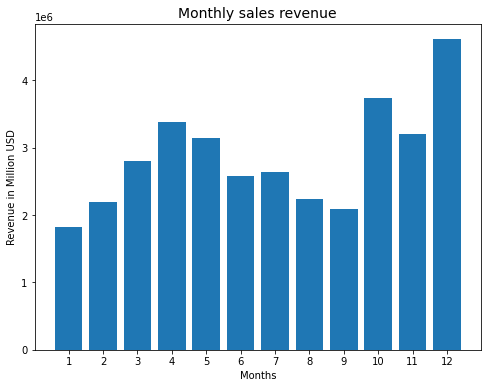

In [78]:
plt.figure(figsize=(8,6))
plt.bar(total_montly_sales.index, total_montly_sales.values)
plt.xticks(range(1,13))
plt.xlabel("Months")
plt.ylabel("Revenue in Million USD")
plt.title('Monthly sales revenue', fontdict={'fontsize':14})
plt.show()

### Task 2. What city ordered the largest quantity of products?

This time we will group orders based on the city - recall that we have created Purchase City column out of the Purchase Address column

In [79]:
products_per_city = sales.groupby('Purchase City').sum()['Quantity Ordered']

In [80]:
products_per_city.sort_values(ascending=False)

Purchase City
San Francisco (CA)    50239.0
Los Angeles (CA)      33289.0
New York City (NY)    27932.0
Boston (MA)           22528.0
Dallas (TX)           16730.0
Atlanta (GA)          16602.0
Seattle (WA)          16553.0
Portland (OR)         11303.0
Austin (TX)           11153.0
Portland (ME)          2750.0
Name: Quantity Ordered, dtype: float64

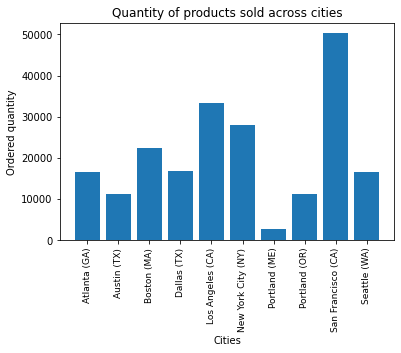

In [82]:
plt.bar(products_per_city.index, products_per_city.values)
plt.ylabel('Ordered quantity')
plt.title('Quantity of products sold across cities')
plt.xticks(rotation='vertical', size=9)
plt.show()

### Task 3. When, during a day, customers are most likely to make orders?

To answer this one, we can extract the hour from the Order Date and examine the distribution of orders across the 24 hours of a day

In [83]:
sales['Order Hour'] = sales['Order Date'].dt.hour

In [84]:
sales.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Purchase City,Total price,Order Month,Order Hour
45426,152338,AA Batteries (4-pack),1.0,3.84,2019-02-27 11:00:00,"111 Jackson St, San Francisco, CA 94016",San Francisco (CA),3.84,2,11
119462,261639,Wired Headphones,1.0,11.99,2019-10-13 21:19:00,"494 Cedar St, Los Angeles, CA 90001",Los Angeles (CA),11.99,10,21
28450,179751,Apple Airpods Headphones,1.0,150.00,2019-04-26 22:55:00,"664 Main St, Los Angeles, CA 90001",Los Angeles (CA),150.00,4,22
180978,217306,AAA Batteries (4-pack),1.0,2.99,2019-06-05 19:42:00,"316 River St, Atlanta, GA 30301",Atlanta (GA),2.99,6,19
175951,212511,AA Batteries (4-pack),1.0,3.84,2019-06-16 23:29:00,"308 11th St, Los Angeles, CA 90001",Los Angeles (CA),3.84,6,23


In [86]:
orders_per_hour = sales.groupby('Order Hour').count()['Order ID']

In [88]:
orders_per_hour.sort_values(ascending=False)

Order Hour
19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Order ID, dtype: int64

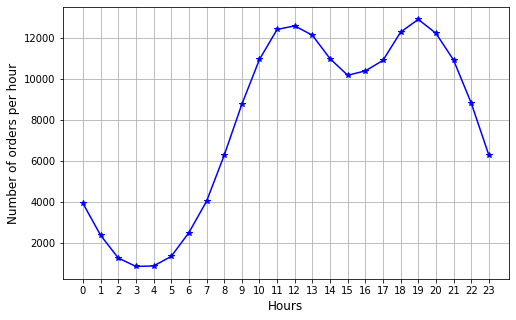

In [89]:
plt.figure(figsize=(8,5))

# Shorthand notation
# fmt = '[color][marker][line]'
plt.plot(orders_per_hour.index, orders_per_hour.values, 'b*-')

plt.xticks(range(0,24))
plt.xlabel("Hours", fontdict={'fontsize':12})
plt.ylabel("Number of orders per hour", fontdict={'fontsize':12})
plt.grid(True)

plt.show()

### Task 4. What product sold the most? What product contributed the most to the total revenue?

Let's first see how many different products are there and how frequently they were ordered

In [90]:
sales.Product.nunique()

19

In [95]:
sales.Product.value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

While the above series gives us the number of orders that a product appeared in, it does not tell us about the quantities that were ordered.

For each product, we need to take the overall quantity ordered and total price across all orders related to that product

In [96]:
sales_per_product = sales.groupby('Product').sum()[['Quantity Ordered', 'Total price']]

In [97]:
sales_per_product.head()

,Quantity Ordered,Total price
Product,,
20in Monitor,4129.0,454148.71
27in 4K Gaming Monitor,6244.0,2435097.56
27in FHD Monitor,7550.0,1132424.50
34in Ultrawide Monitor,6199.0,2355558.01
AA Batteries (4-pack),27635.0,106118.40


Get the products that sold the most:

In [98]:
sales_per_product.sort_values(by="Quantity Ordered", ascending=False).head(5)

,Quantity Ordered,Total price
Product,,
AAA Batteries (4-pack),31017.0,92740.83
AA Batteries (4-pack),27635.0,106118.40
USB-C Charging Cable,23975.0,286501.25
Lightning Charging Cable,23217.0,347094.15
Wired Headphones,20557.0,246478.43


Get the products with the highest total revenue

In [99]:
sales_per_product.sort_values(by="Total price", ascending=False).head(5)

,Quantity Ordered,Total price
Product,,
Macbook Pro Laptop,4728.0,8037600.00
iPhone,6849.0,4794300.00
ThinkPad Laptop,4130.0,4129958.70
Google Phone,5532.0,3319200.00
27in 4K Gaming Monitor,6244.0,2435097.56


We can also plot these data

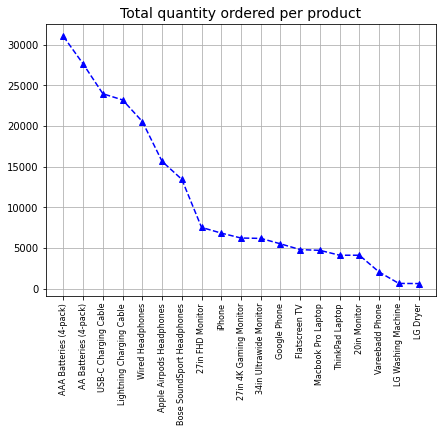

In [103]:
sales_quantity_sorted = sales_per_product.sort_values(by="Quantity Ordered", ascending=False)

plt.figure(figsize=(7,5))
plt.plot(sales_quantity_sorted.index, sales_quantity_sorted['Quantity Ordered'], 'b^--')
plt.title('Total quantity ordered per product', fontdict={'fontsize':14})
plt.xticks(rotation='vertical', size=8)
plt.grid(True)
plt.show()

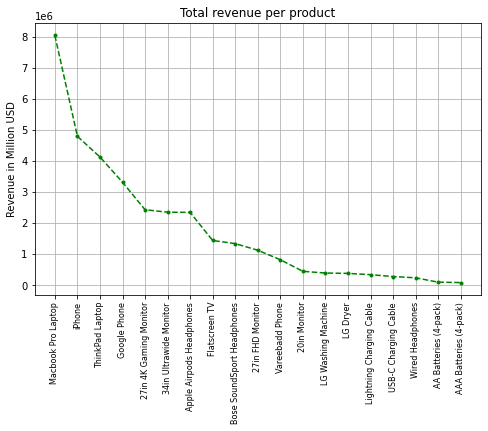

In [105]:
sales_total_sorted = sales_per_product.sort_values(by="Total price", ascending=False)

plt.figure(figsize=(8,5))

plt.plot(sales_total_sorted.index, sales_total_sorted['Total price'], 'g.--')
plt.xticks(rotation='vertical', size=8)
plt.ylabel("Revenue in Million USD")
plt.title("Total revenue per product")
plt.grid(True)
plt.show()

We can also combine the two plots.

Example how this can bee done: https://matplotlib.org/gallery/api/two_scales.html

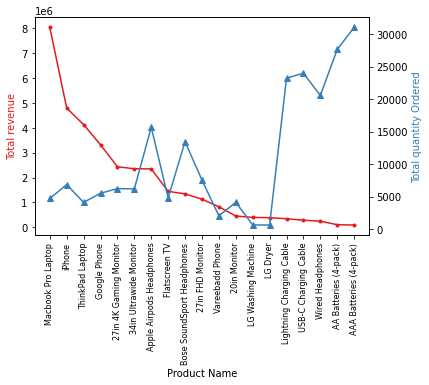

In [109]:
import matplotlib.ticker as mticker

fig, ax1 = plt.subplots()

colors = ['#e41a1c','#377eb8']

ax2 = ax1.twinx()
ax1.plot(sales_total_sorted.index, sales_total_sorted['Total price'], color=colors[0], marker='.')
ax2.plot(sales_total_sorted.index, sales_total_sorted['Quantity Ordered'], color=colors[1], marker='^')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Total revenue', color=colors[0])
ax2.set_ylabel('Total quantity Ordered', color=colors[1])

ticks_loc = ax1.get_xticks()
# https://stackoverflow.com/questions/63723514/userwarning-fixedformatter-should-only-be-used-together-with-fixedlocator
ax1.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax1.set_xticklabels(sales_total_sorted.index, rotation='vertical', size=8)

plt.show()

### Task 5. Examine product sales across cities

Note that we can group the data based on more than one attribute (column). <br> In this case, we will do the grouping based on the product and the city

In [114]:
sales.groupby(['Product', 'Purchase City'])['Total price'].sum()

Product       Purchase City     
20in Monitor  Atlanta (GA)            37616.58
              Austin (TX)             25297.70
              Boston (MA)             43336.06
              Dallas (TX)             37726.57
              Los Angeles (CA)        72373.42
                                       ...    
iPhone        New York City (NY)     616700.00
              Portland (ME)           55300.00
              Portland (OR)          259700.00
              San Francisco (CA)    1162700.00
              Seattle (WA)           382200.00
Name: Total price, Length: 190, dtype: float64

Note that we are getting a series with 2 indexes - Product and Purchase City. <br>We can transform this into a DataFrame by calling the `unstack()` method

In [116]:
prod_per_city_sales = sales.groupby(['Product', 'Purchase City'])['Total price'].sum().unstack()

In [117]:
prod_per_city_sales.head()

Purchase City,Atlanta (GA),Austin (TX),Boston (MA),Dallas (TX),Los Angeles (CA),New York City (NY),Portland (ME),Portland (OR),San Francisco (CA),Seattle (WA)
Product,,,,,,,,,,
20in Monitor,37616.58,25297.70,43336.06,37726.57,72373.42,61594.40,6489.41,24087.81,109990.00,35636.76
27in 4K Gaming Monitor,192265.07,124016.82,263243.25,187585.19,391159.97,328371.58,33149.15,136106.51,569385.40,209814.62
27in FHD Monitor,88194.12,53996.40,119542.03,88044.13,183437.77,160789.28,17098.86,62395.84,272081.86,86844.21
34in Ultrawide Monitor,183155.18,124636.72,254973.29,194554.88,362890.45,329831.32,28879.24,124256.73,549465.54,202914.66
AA Batteries (4-pack),8421.12,5468.16,11581.44,8682.24,17041.92,13939.20,1493.76,5952.00,25171.20,8367.36


We can now plot this matrix using a heathmap. One way to do it is illustrated here: <br> 
https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/

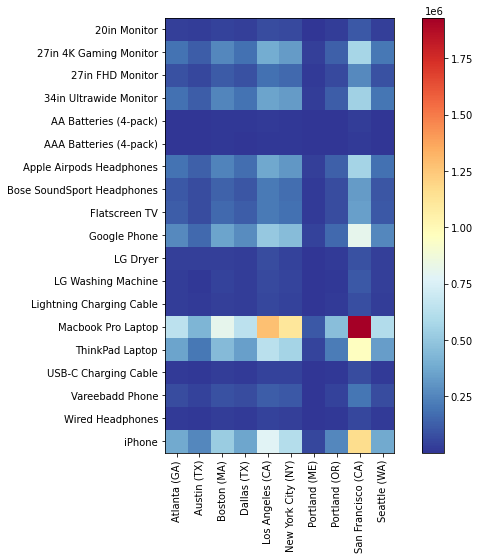

In [118]:
plt.figure(figsize=(10,8))

# Displaying dataframe as a heatmap with the given colourmap
# _r reverses the normal order of the color map 'RdYlBu'
plt.imshow(prod_per_city_sales, cmap ="RdYlBu_r") 
  
# Displaying a color bar to denote which color represents which range of data 
plt.colorbar() 

plt.yticks(range(len(prod_per_city_sales.index)), prod_per_city_sales.index)
plt.xticks(range(len(prod_per_city_sales.columns)), prod_per_city_sales.columns, rotation='vertical')
plt.show()

